<a href="https://colab.research.google.com/github/Rashed-Moshrefi-CMD/MachineLearning/blob/main/DL_Sheet02_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Winter Term 2025/2026

<hr style="border:2px solid gray">

### Exercise Sheet 02

<br>

# New Section

# 5.2) Train MLP with nonlinear decision boundary in PyTorch

Until now, we used our own framework. From now on, we will use PyTorch throughout this semester (in fact, we will use it next semester as well). It is a ubiquitiuos and easy-to-use library that allows rapid prototyping of deep learning models. Chances are high, that you will use it in your professional life later. Therefore, we encourage you to get a good grasp of it as soon as possible. You will see that the inferface is very similar to the framework you built yourself. Here is a relatively short tutorial about the backbones of PyTorch:

[https://youtu.be/nf-r9gnum7o?si=57TdegnhlFDuQ1Bg](https://youtu.be/nf-r9gnum7o?si=57TdegnhlFDuQ1Bg)

You can also use google colab for PyTorch (even with GPU support, which might be helpful for later exercise sheets).

Introduction to Colab
[https://colab.research.google.com](https://colab.research.google.com)

Tutorial 2: Introduction to PyTorch
[https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb](https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb)

But now, let's get to the action!

In [15]:
!unzip dl25-sheet02-deepswarm-main -d .
%cd dl25-sheet02-deepswarm-main/code
!ls


Archive:  dl25-sheet02-deepswarm-main.zip
52a1592be9853bad9e15f8769004aef202a117f5
replace ./dl25-sheet02-deepswarm-main/.github/.keep? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: ./dl25-sheet02-deepswarm-main/.github/.keep  
  inflating: ./dl25-sheet02-deepswarm-main/.gitignore  
  inflating: ./dl25-sheet02-deepswarm-main/DL-Sheet02.pdf  
  inflating: ./dl25-sheet02-deepswarm-main/README.md  
  inflating: ./dl25-sheet02-deepswarm-main/code/2d_pcl_dataset.npz  
  inflating: ./dl25-sheet02-deepswarm-main/code/CompGraph.py  
  inflating: ./dl25-sheet02-deepswarm-main/code/DL-Sheet02-DB.ipynb  
  inflating: ./dl25-sheet02-deepswarm-main/code/DL-Sheet02-XOR.ipynb  
/content/dl25-sheet02-deepswarm-main/code
2d_pcl_dataset.npz  CompGraph.py  DL-Sheet02-DB.ipynb  DL-Sheet02-XOR.ipynb


In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Import the pytorch library. You might need to install it.
import torch
from torch import nn

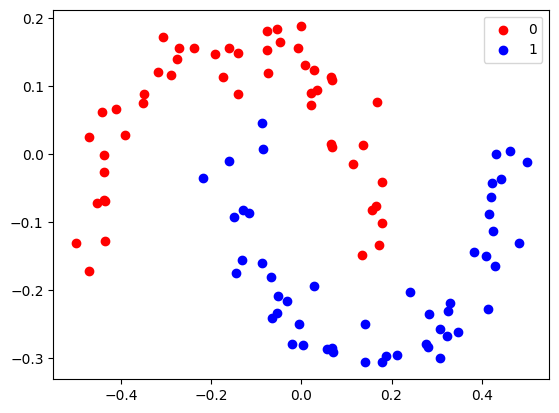

<Figure size 640x480 with 0 Axes>

In [18]:
# We provide you the dataset in .npz file. You just need to load it here.
dataset = np.load('2d_pcl_dataset.npz')
X, y = dataset['X'], dataset['y']

### Plot the data ###
X0 = X[y==0] # 50 2D points have label 0
X1 = X[y==1] # 50 2D points have label 1

y = np.expand_dims(y, axis=1)

def plot(X0, X1, fit_param=None):
    plt.scatter(X0[:,0], X0[:,1], color='red', label=0)
    plt.scatter(X1[:,0], X1[:,1], color='blue', label=1)

    plt.legend()
    plt.show()
    plt.clf()

plot(X0, X1)

In [29]:
# Create the MLP class

class MLP(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # TODO: Create a network with nn.Sequential that is combination of linear layers
        # Again, you need to decide the size of the network, about the bias term and activation functions
        # self.layers = nn.Sequential(nn.Linear(....
        self.layers = nn.Sequential(
            nn.Linear(2, 16), #2 features input
            nn.ReLU(),
            nn.Linear(16,1), #1 logit output
            nn.Sigmoid()
        )

        #raise NotImplementedError

    def forward(self, x):
        ''' forward pass '''
        return self.layers(x)


In [30]:
# Set fixed random number seed (for reproducibility)
torch.manual_seed(42)

In [31]:
# initialize the model
model = MLP()

# Look at the model and the number of parameters
print(model)
print("number of parameters", sum(p.numel() for p in model.parameters()))

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
number of parameters 65


In [32]:
# TODO: Set the loss function. Which function makes sense for the problem at hand?
# criterion = nn.(your loss function here)
criterion = nn.BCELoss()


In [41]:
# TODO: Set the optimizer. Start with SGD in the beginning.
# Afterwards you can try different algorithms from the lecture
# and see how effective they are. Try also different learning rates
# to develop an intuition about the effect of it.
learning_rate = 0.1 #can be different values e.g. 0.001,0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)#, momentum=0.9)


In [42]:
# Before starting the training we need to convert the data into a tensor
# Pytorch works **only** with tensors
X = torch.Tensor(X).float()
y = torch.Tensor(y).float()
print(X.dtype, y.dtype)

torch.float32 torch.float32


In [43]:
# Training loop

# Let the model know we are training
model.train()

# This time, we provide you the training loop.
# You have done it already in the previous exercise.
# You might still need to decide for the training length though.
# It is a hyperparameter and depends on other features of your network.
epochs = 10000 # TODO: change None with a reasonable number
print_every = 100
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    y_hat = model(X)

    # Compute the loss
    loss = criterion(y_hat, y)

    # Backward pass
    loss.backward()

    # Weight update
    optimizer.step()

    # Print loss
    if epoch % print_every == 0: # TODO: change None with a reasonable number
        print(f'Loss after epoch {epoch} --> {loss.item()}')

print('Training completed')

Loss after epoch 0 --> 0.2726326882839203
Loss after epoch 100 --> 0.23328077793121338
Loss after epoch 200 --> 0.2287907749414444
Loss after epoch 300 --> 0.2276591658592224
Loss after epoch 400 --> 0.2275317758321762
Loss after epoch 500 --> 0.22793635725975037
Loss after epoch 600 --> 0.2274390161037445
Loss after epoch 700 --> 0.22738735377788544
Loss after epoch 800 --> 0.23004037141799927
Loss after epoch 900 --> 0.0017968463944271207
Loss after epoch 1000 --> 0.0007062512449920177
Loss after epoch 1100 --> 0.00041722110472619534
Loss after epoch 1200 --> 0.0002843722759280354
Loss after epoch 1300 --> 0.00020907745056319982
Loss after epoch 1400 --> 0.00016093334124889225
Loss after epoch 1500 --> 0.00012845557648688555
Loss after epoch 1600 --> 0.00010502378427190706
Loss after epoch 1700 --> 8.746080129640177e-05
Loss after epoch 1800 --> 7.396773435175419e-05
Loss after epoch 1900 --> 6.340906111290678e-05
Loss after epoch 2000 --> 5.482770939124748e-05
Loss after epoch 2100 

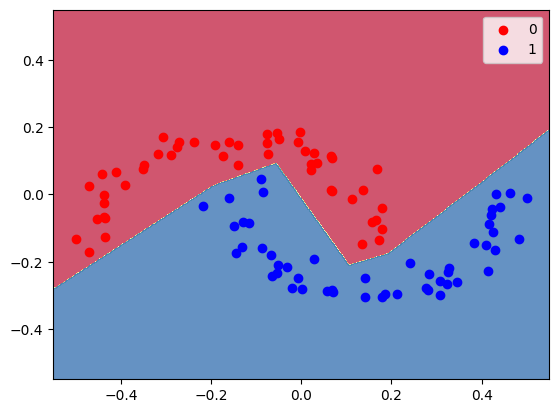

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot model's performance

# Create numbers in a mesh to feed into the model
p = np.linspace(-0.55, 0.55, 500)
x_plot, y_plot = np.meshgrid(p, p)
X_plot = np.stack((x_plot, y_plot), axis=2).reshape(-1, 2)

# Feed the created numbers into the model
model.eval()
output = model(torch.Tensor(X_plot)).detach().numpy()
output = np.round(output).reshape(x_plot.shape[0], x_plot.shape[1])

plt.contourf(x_plot, y_plot, output, cmap=plt.cm.Spectral, alpha=0.8)

# # Following plots only the decision boundary
# plt.contour(x_plot, y_plot, output, [0.5],
#                   colors=('k',),
#                   linewidths=(3,))
# Plot the dots
plot(X0, X1)
